# Medical Insurance Cost Prediction Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset and forming a dataframe 

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Checking for null values 

In [7]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

### Dropping Duplicates if any 

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1337, 7)

In [10]:
dff=pd.read_csv("insurance.csv",index_col="age")
dff.head()

,sex,bmi,children,smoker,region,charges
age,,,,,,
19,female,27.900,0,yes,southwest,16884.92400
18,male,33.770,1,no,southeast,1725.55230
28,male,33.000,3,no,southeast,4449.46200
33,male,22.705,0,no,northwest,21984.47061
32,male,28.880,0,no,northwest,3866.85520


## Analzing the trend or effect on charges of insurance with respect to the various parameters. 

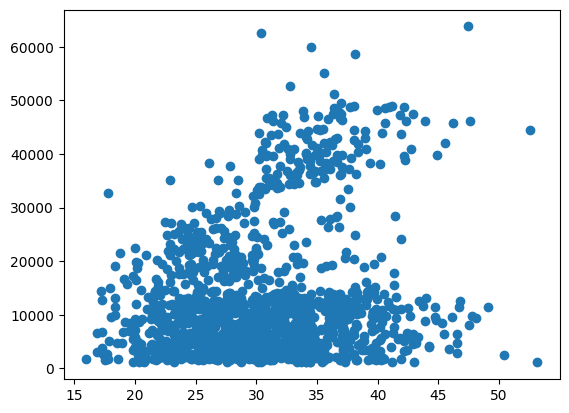

In [11]:
plt.scatter(df.bmi,df.charges)

#### As we can see that scatter plot wont provide satisfactory insight about the dataset.So lets look for the other plots 

<BarContainer object of 1337 artists>

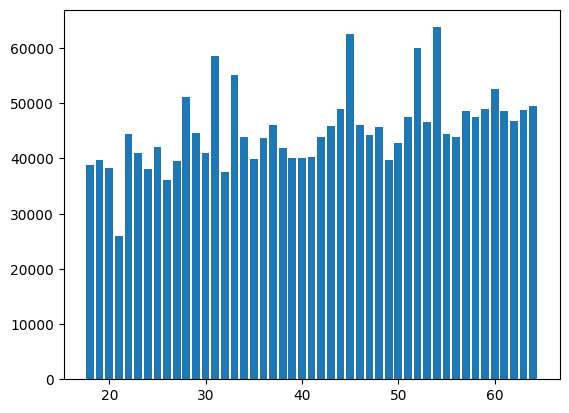

In [12]:
plt.bar(df.age,df.charges)

<AxesSubplot: >

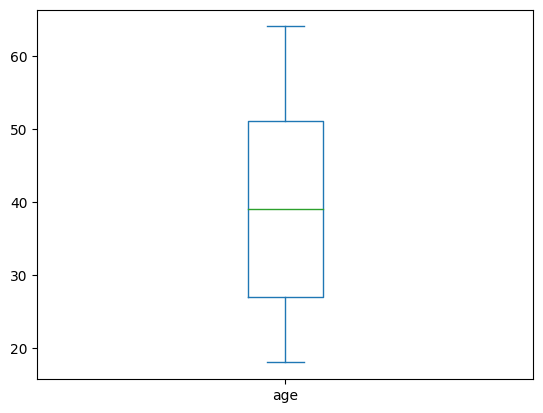

In [13]:
df["age"].plot(kind="box")

<AxesSubplot: >

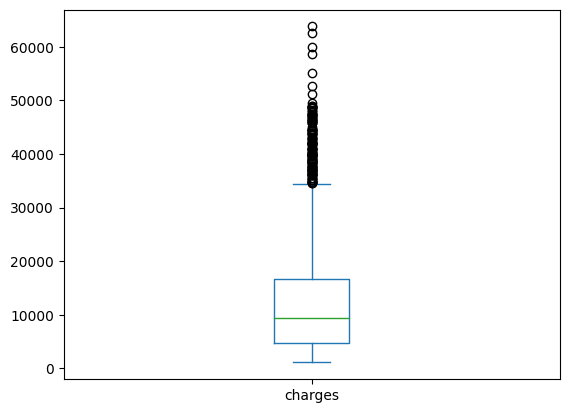

In [14]:
df["charges"].plot(kind="box")

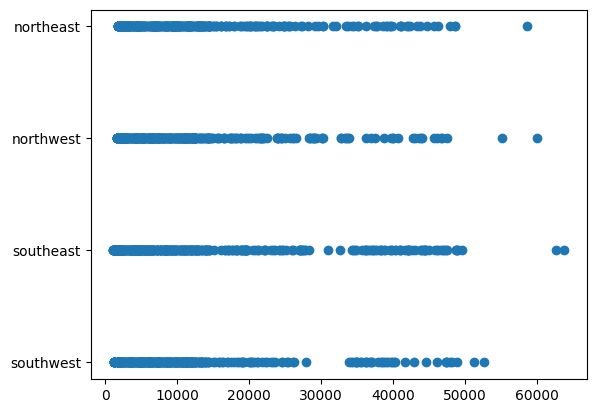

In [15]:
plt.scatter(df.charges,df.region)

In [16]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1048,25,female,22.515,1,no,northwest,3594.17085
619,55,female,37.100,0,no,southwest,10713.64400
1327,51,male,30.030,1,no,southeast,9377.90470
1244,18,male,33.330,0,no,southeast,1135.94070
802,21,male,22.300,1,no,southwest,2103.08000
753,58,female,22.770,0,no,southeast,11833.78230
1272,43,male,25.520,5,no,southeast,14478.33015
971,34,female,23.560,0,no,northeast,4992.37640
32,19,female,28.600,5,no,southwest,4687.79700
56,58,female,31.825,2,no,northeast,13607.36875


<BarContainer object of 1337 artists>

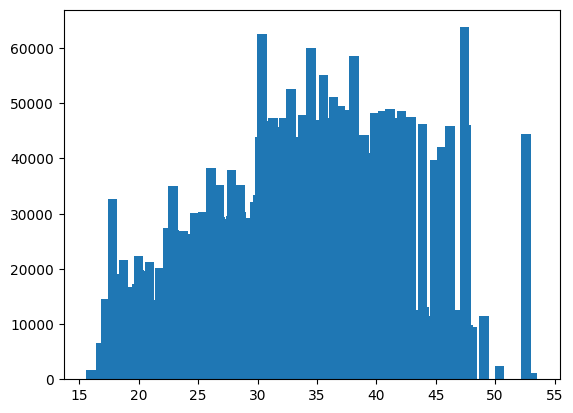

In [17]:
plt.bar(df.bmi,df.charges)

<AxesSubplot: >

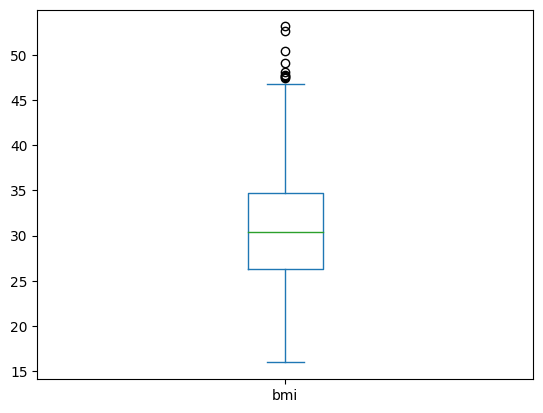

In [18]:
df["bmi"].plot(kind="box")

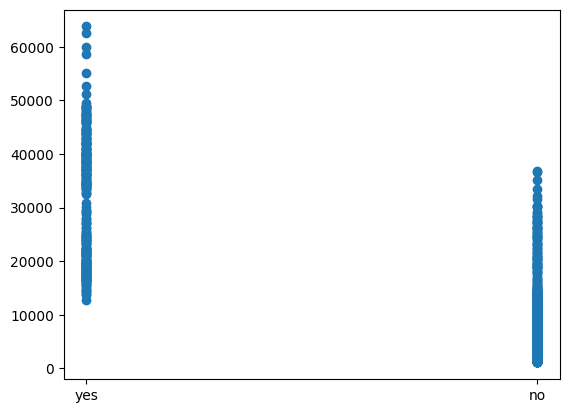

In [19]:
plt.scatter(df.smoker,df.charges)

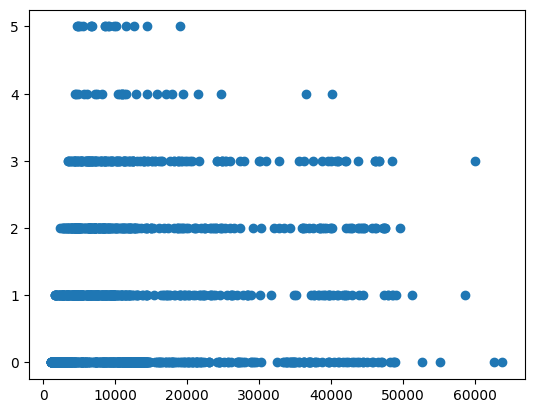

In [20]:
plt.scatter(df.charges,df.children)

In [21]:
df.charges.describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

## Converting categorical values to Numerical Values

In [22]:
num_data={"sex":{ "male":0,"female":1},
           "smoker":{"yes":1,"no":0},
           "region":{'northwest':0, 'northeast':1,'southeast':2,'southwest':3}}

In [23]:
data_copy=df.copy()
data_copy.replace(num_data,inplace=True)
data_copy.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
5,31,1,25.740,0,0,2,3756.62160
6,46,1,33.440,1,0,2,8240.58960
7,37,1,27.740,3,0,0,7281.50560
8,37,0,29.830,2,0,1,6406.41070
9,60,1,25.840,0,0,0,28923.13692


## Correlation Matrix

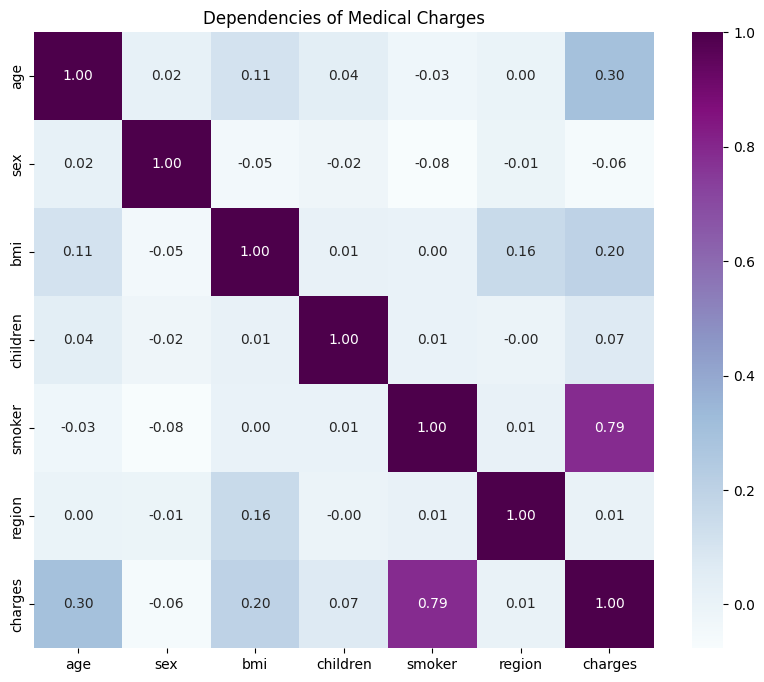

In [24]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

### Smoker, BMI and Age are most important factors that determines the Charges

### As we can see that the correlation of the charges with sex, children and the region is not so significant so we can drop these columns in order to simplify the model

## Plotting Skew and Kurtosis

In [25]:
print("Printing kurtosis and skewness for different columns")
print()
for col in list(data_copy.columns):
  print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))

Printing kurtosis and skewness for different columns

age : Skewness 0.055 and  Kurtosis -1.244
sex : Skewness 0.019 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.053
children : Skewness 0.937 and  Kurtosis 0.201
smoker : Skewness 1.464 and  Kurtosis 0.142
region : Skewness -0.039 and  Kurtosis -1.328
charges : Skewness 1.515 and  Kurtosis 1.604


## Plotting the distribution plots for various factors.

C:\Users\user\AppData\Local\Temp\ipykernel_7104\1506065407.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


Text(0, 0.5, 'count')

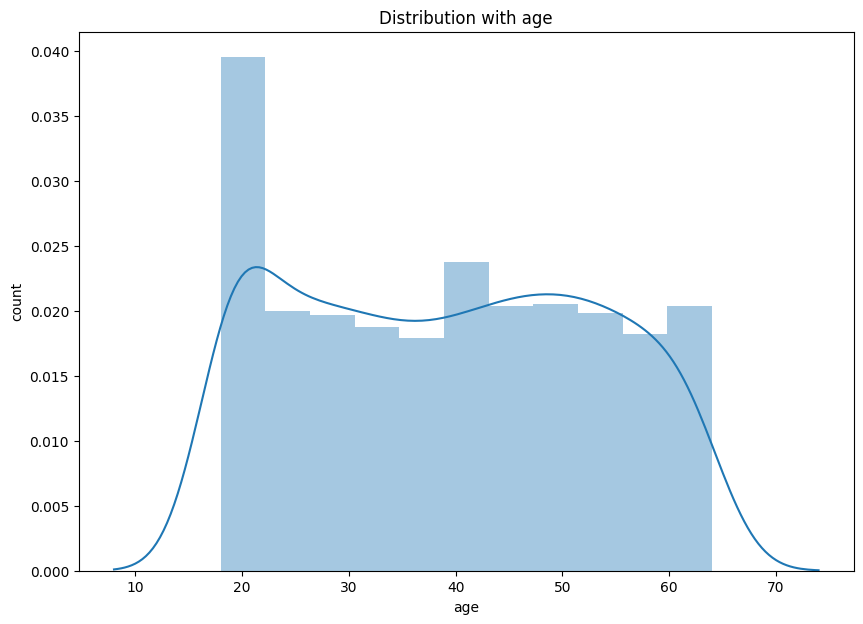

In [26]:
plt.figure(figsize=(10,7))
sns.distplot(df["age"])
plt.title("Distribution with age")
plt.xlabel("age")
plt.ylabel("count")

C:\Users\user\AppData\Local\Temp\ipykernel_7104\3745551128.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["charges"])


Text(0, 0.5, 'count')

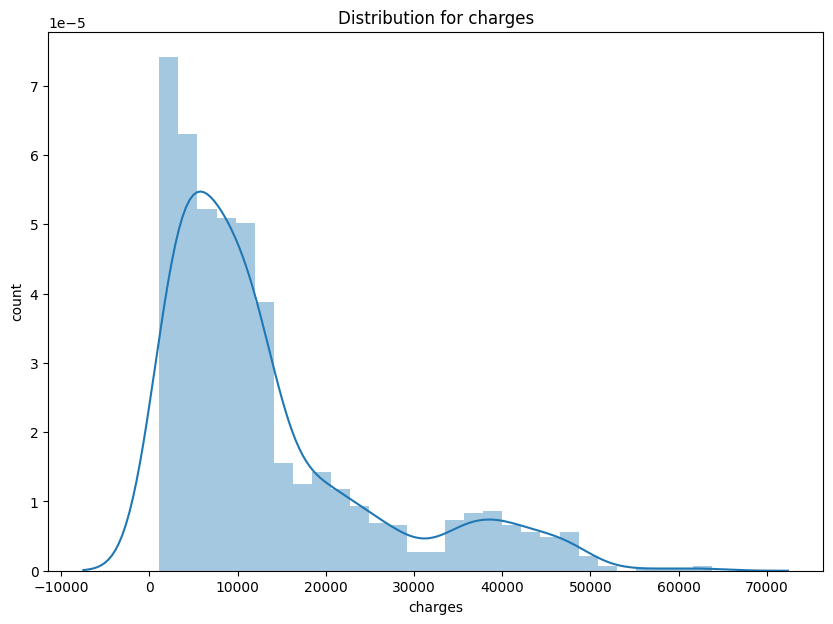

In [27]:
plt.figure(figsize=(10,7))
sns.distplot(df["charges"])
plt.title("Distribution for charges")
plt.xlabel("charges")
plt.ylabel("count")

### There might be some cases like above where the charges for the medical insurances are very less. So they cant be necessarily said  as outliers 

C:\Users\user\AppData\Local\Temp\ipykernel_7104\1905283173.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


Text(0, 0.5, 'count')

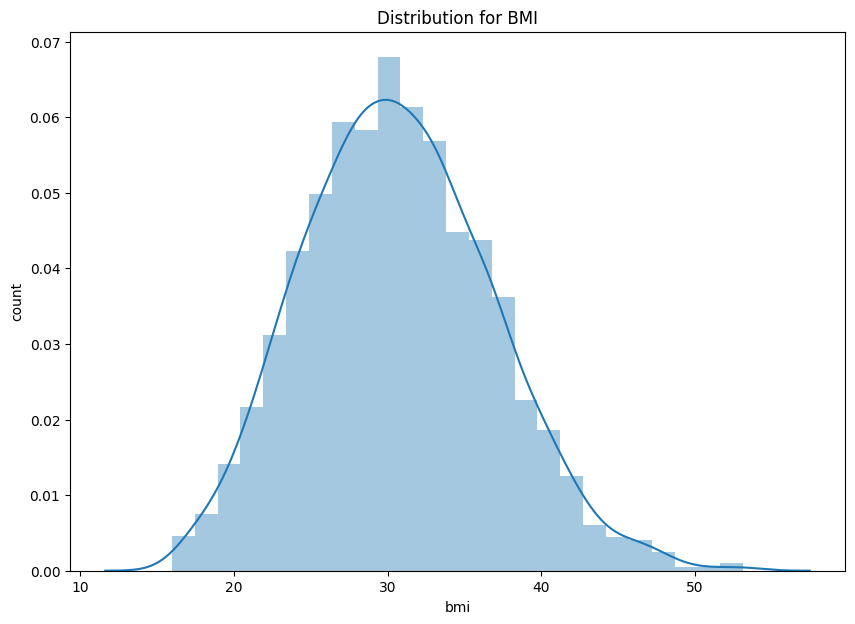

In [28]:
plt.figure(figsize=(10,7))
sns.distplot(df["bmi"])
plt.title("Distribution for BMI")
plt.xlabel("bmi")
plt.ylabel("count")

## Scaling of Dataset

In [29]:
from sklearn.preprocessing import StandardScaler

data_pre=data_copy.copy()

tempbmi=data_pre.bmi
tempbmi=tempbmi.values.reshape(-1,1)
data_pre["bmi"]=StandardScaler().fit_transform(tempbmi)

tempage=data_pre.age
tempage=tempage.values.reshape(-1,1)
data_pre["age"]=StandardScaler().fit_transform(tempage)

tempcharges=data_pre.charges
tempcharges=tempcharges.values.reshape(-1,1)
data_pre["charges"]=StandardScaler().fit_transform(tempcharges)

data_pre.head()



,age,sex,bmi,children,smoker,region,charges
0,-1.440418,1,-0.453160,0,1,3,0.297857
1,-1.511647,0,0.509422,1,0,2,-0.954381
2,-0.799350,0,0.383155,3,0,2,-0.729373
3,-0.443201,0,-1.305052,0,0,0,0.719104
4,-0.514431,0,-0.292456,0,0,0,-0.777499


## Spliting the dataset into training and testing set 

In [30]:
from sklearn.model_selection import train_test_split

X=data_pre.drop("charges",axis="columns")
y=data_pre["charges"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
len(X_train)

1069

In [32]:
len(X_test)

268

## Importing the various libraries needed for preparing different models

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

## Linear Regression

In [34]:
model_LR=LinearRegression()
model_LR.fit(X_train,y_train)

LinearRegression()

## Scores_Linear_Regression

In [35]:
cv_linear_reg=cross_val_score(estimator=model_LR,X=X,y=y,cv=10)

y_LR_predicted_train=model_LR.predict(X_train)
y_LR_predicted_test=model_LR.predict(X_test)

LR_R2_score_train=r2_score(y_train,y_LR_predicted_train)
LR_R2_score_test=r2_score(y_test,y_LR_predicted_test)

mse_LR=mean_squared_error(y_test,y_LR_predicted_test)

print(cv_linear_reg.mean())
print(LR_R2_score_train)
print(LR_R2_score_test)
print(mse_LR)

0.7442861476670358
0.7294490362108279
0.8061028038524822
0.2431218970444952


## Best Model Using GridSearchCV 

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
model_params={
    "SVM":{
        "model":SVR(gamma="auto"),
        "params":{
            "C":[1,10,20,40],
            "kernel":["rbf","linear"]
        }
    },
    "LassoRegression":{
        "model":Lasso(),
        "params":{
            "alpha":[0.01,0.1,1,10]
        }
    },
    "RandomForest":{
        "model":RandomForestRegressor(),
        "params":{
            "n_estimators":[3,5,7,10]
        }
    },
    "KNN":{
        "model":KNeighborsRegressor(),
        "params":{
            "n_neighbors":[3,6,10]
        }
    },
    "RidgeRegression":{
        "model":Ridge(),
        "params":{
            "alpha":[0.01,0.1,1,10]
        }
    }
}

In [38]:
scores=[]

for model_name,mp in model_params.items():
    clf=GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
    "model":model_name,
    "best_params":clf.best_params_,
    "best_score":clf.best_score_})

scores_df=pd.DataFrame(scores,columns=["model","best_params","best_score"]) 

In [39]:
scores_df

,model,best_params,best_score
0,SVM,"{'C': 10, 'kernel': 'rbf'}",0.813551
1,LassoRegression,{'alpha': 0.01},0.725515
2,RandomForest,{'n_estimators': 10},0.803711
3,KNN,{'n_neighbors': 3},0.612401
4,RidgeRegression,{'alpha': 1},0.725835


## Hence the best model for the above dataset is SVM and RandomForest with the given parameters 